In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/college-placement/placement-dataset.csv')
df = df.drop("Unnamed: 0", axis=1)
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [3]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


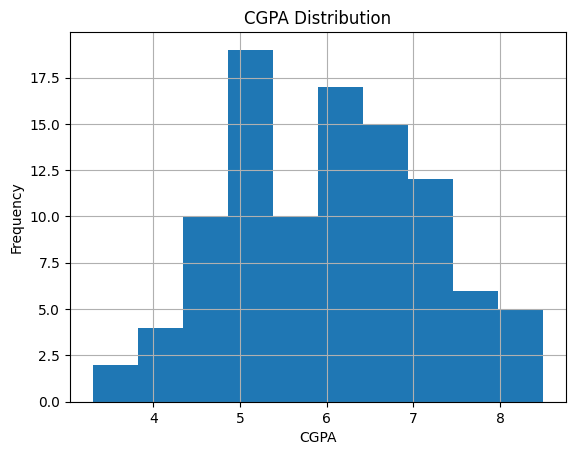

In [4]:
df['cgpa'].hist()
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

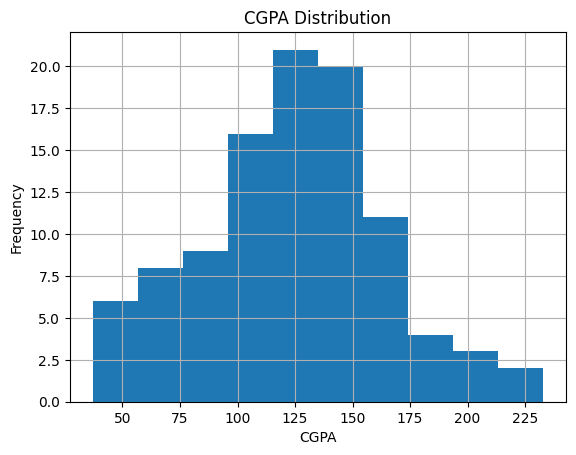

In [5]:
df['iq'].hist()
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Assuming df is already defined and has 'cgpa' and 'iq' columns
correlation = df['cgpa'].corr(df['iq'])

print("The correlation coefficient between CGPA and IQ is:", correlation)

The correlation coefficient between CGPA and IQ is: -0.0987906720582117


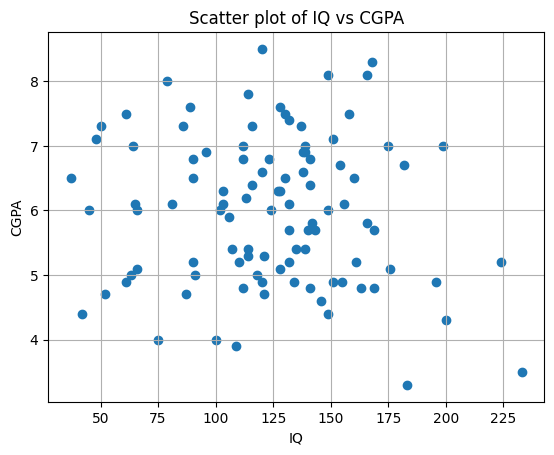

In [7]:
plt.scatter(df['iq'], df['cgpa'])
plt.title('Scatter plot of IQ vs CGPA')
plt.xlabel('IQ')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()

no correlation. very interesting

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
X = df[['cgpa', 'iq']]  # Features
y = df['placement']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.85
Confusion Matrix:
 [[9 1]
 [2 8]]


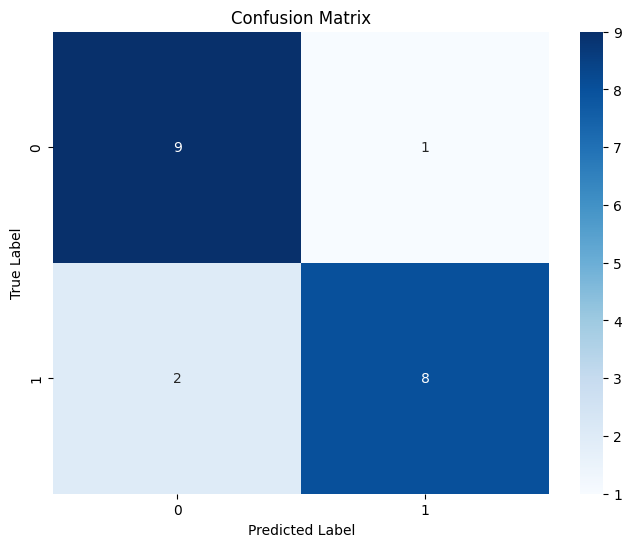

In [11]:

# Using Matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9
Confusion Matrix:
 [[10  0]
 [ 2  8]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


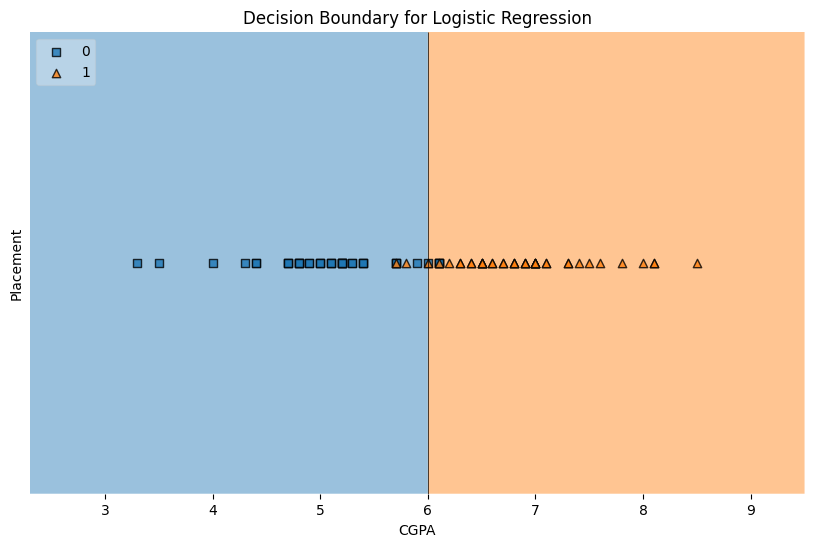

In [12]:
from mlxtend.plotting import plot_decision_regions

# Prepare the features and target variable
X = df[['cgpa']]  # Using only 'cgpa' as the feature
y = df['placement']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Convert X_train and y_train to NumPy arrays for the plotting function
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Visualizing the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_np, y_train_np, clf=model, legend=2)
plt.xlabel('CGPA')
plt.ylabel('Placement')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

In [13]:
X = df[['iq']]  # Features
y = df['placement']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.4
Confusion Matrix:
 [[4 6]
 [6 4]]


IQ is a terrible predictor. 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[['cgpa']]  # Features
y = df['placement']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.95
Confusion Matrix:
 [[ 9  1]
 [ 0 10]]


that's actually pretty good!

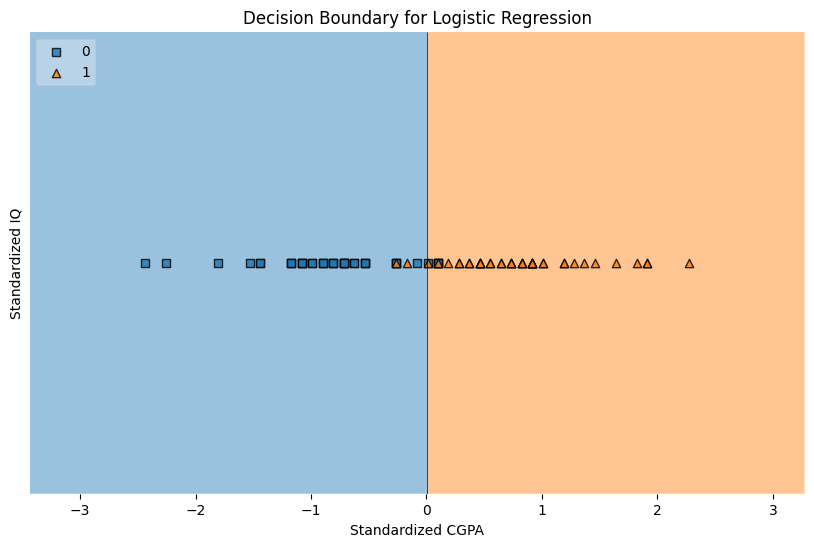

In [15]:
from mlxtend.plotting import plot_decision_regions

# Assuming you've scaled your features as X_train_scaled and you have y_train from before
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# No need to convert to NumPy arrays since they already are
X_train_np = X_train_scaled  # Already a NumPy array
y_train_np = y_train.to_numpy()  # Convert y_train to a NumPy array if it's not already

# Plotting
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_np, y_train_np, clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Standardized IQ')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

Accuracy: 0.85
Confusion Matrix:
 [[9 1]
 [2 8]]


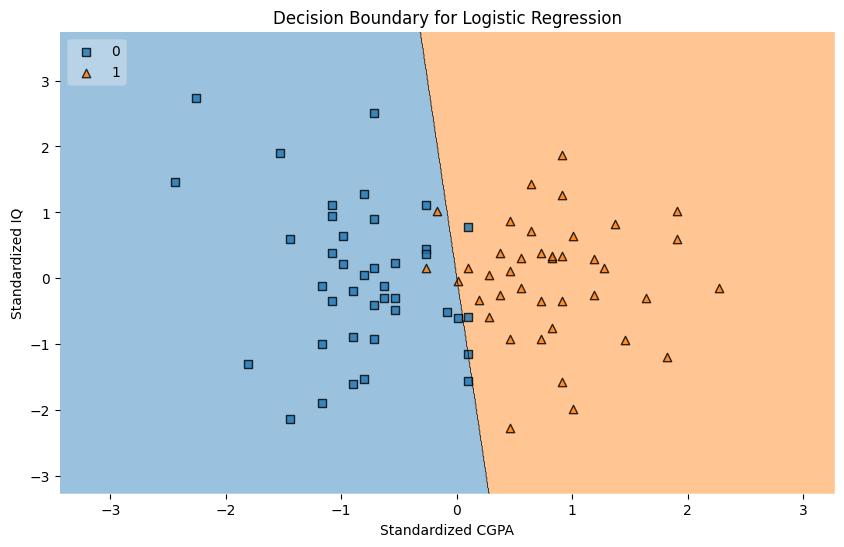

In [16]:
X = df[['cgpa','iq']]  # Features
y = df['placement']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Assuming you've scaled your features as X_train_scaled and you have y_train from before
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# No need to convert to NumPy arrays since they already are
X_train_np = X_train_scaled  # Already a NumPy array
y_train_np = y_train.to_numpy()  # Convert y_train to a NumPy array if it's not already

# Plotting
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_np, y_train_np, clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Standardized IQ')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

OBVIOUSLY it is a good idea to completely ignore IQ as it isnt good for our prediction

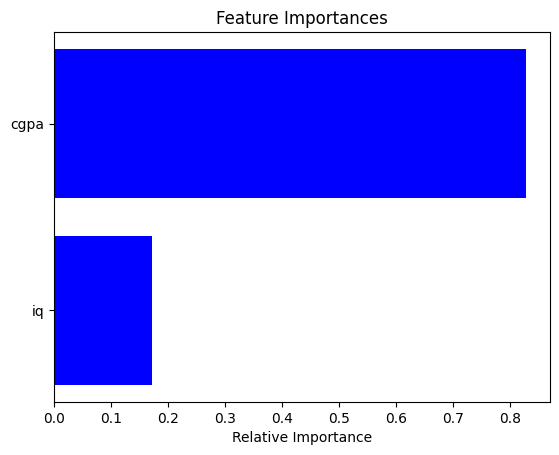

In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assume X and y are already defined and split into train and test sets
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get and visualize feature importances
importances = model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [18]:
importances

array([0.82750366, 0.17249634])

IQ doesnt matter much

In [19]:
from sklearn.svm import SVC
X = df[['cgpa','iq']]  # Using only 'cgpa' as the feature for simplicity
y = df['placement']  # Target variable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVC(kernel='linear')  # You can try other kernels like 'rbf'
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.95
Confusion Matrix:
 [[ 9  1]
 [ 0 10]]


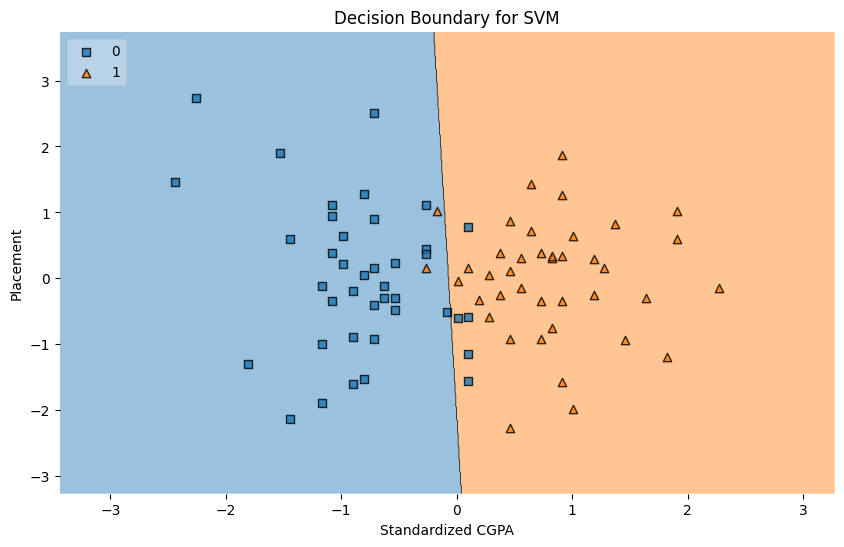

In [20]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train.values, clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Placement')
plt.title('Decision Boundary for SVM')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with the number of neighbors
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9
Confusion Matrix:
 [[10  0]
 [ 2  8]]


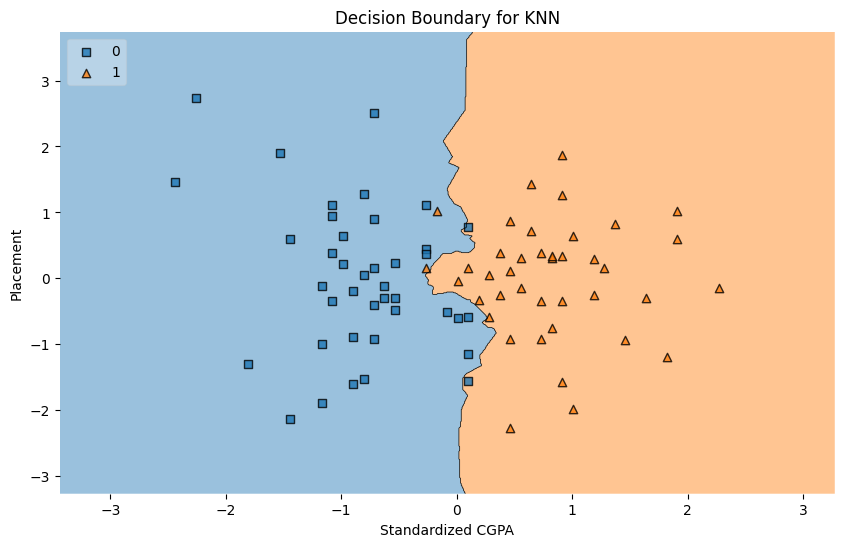

In [22]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train.values, clf=model, legend=2)
plt.xlabel('Standardized CGPA')
plt.ylabel('Placement')
plt.title('Decision Boundary for KNN')
plt.show()

Accuracy: 0.9
Confusion Matrix:
 [[10  0]
 [ 2  8]]


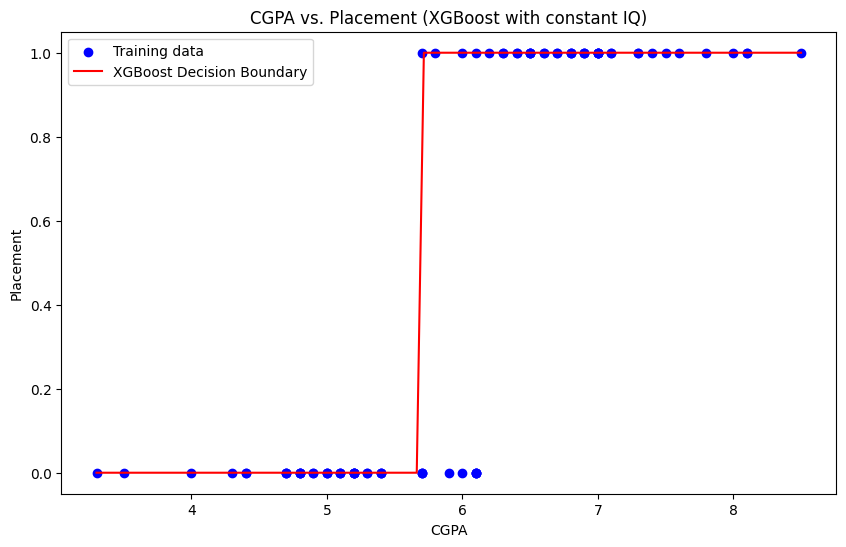

In [23]:
import xgboost as xgb

X = df[['cgpa', 'iq']]  # Using both 'cgpa' and 'iq' as features
y = df['placement']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Visualization
# Choose a representative value for 'iq' (e.g., the mean)
mean_iq = X_train['iq'].mean()

# Generate a sequence of CGPA values from the min to max range
cgpa_range = np.linspace(X_train['cgpa'].min(), X_train['cgpa'].max(), 100).reshape(-1, 1)

# Create a 2D array combining 'cgpa_range' and the constant 'iq' value
combined_input = np.hstack((cgpa_range, np.full_like(cgpa_range, mean_iq)))

# Predict placement for these CGPA and constant IQ values
predicted_placement = model.predict(combined_input)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train['cgpa'], y_train, color='blue', label='Training data')
plt.plot(cgpa_range, predicted_placement, color='red', label='XGBoost Decision Boundary')
plt.xlabel('CGPA')
plt.ylabel('Placement')
plt.title('CGPA vs. Placement (XGBoost with constant IQ)')
plt.legend()
plt.show()